In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
from tensorflow.keras.layers import Dense

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
single_image=x_train[0]

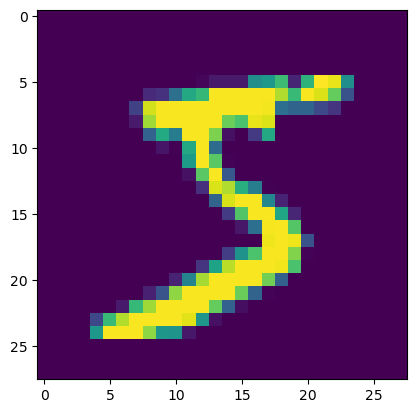

In [13]:
plt.imshow(single_image)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_test=to_categorical(y_test)

In [16]:
y_cat_train=to_categorical(y_train)

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train=x_train.reshape(60000,28,28,1)

In [19]:
x_test.shape

(10000, 28, 28)

In [20]:
x_test=x_test.reshape(10000,28,28,1)

In [21]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten

In [22]:
model=Sequential()

In [23]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy')

In [28]:
model.fit(x=x_train,y=y_cat_train,epochs=5,validation_data=(x_test,y_cat_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - loss: 4.8275 - val_loss: 0.1144
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - loss: 0.0828 - val_loss: 0.0989
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - loss: 0.0565 - val_loss: 0.0986
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 38ms/step - loss: 0.0476 - val_loss: 0.1076
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - loss: 0.0415 - val_loss: 0.1022


In [30]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

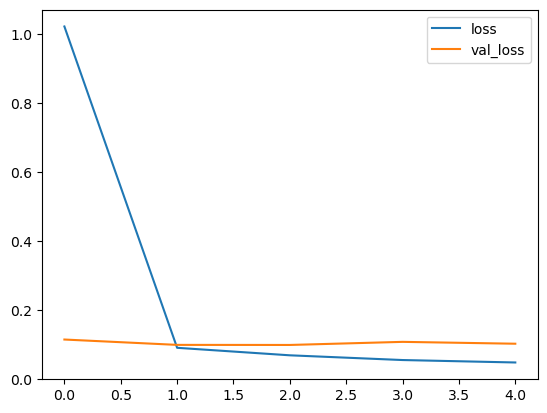

In [31]:
loss_df.plot(kind="line")

In [34]:
single_image=single_image.reshape(-1,28,28,1)

In [36]:
ans=model.predict(single_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [39]:
ans

array([[1.4583756e-15, 1.5669482e-10, 3.8100727e-19, 2.7939785e-04,
        4.9344367e-20, 9.9970633e-01, 1.5076223e-08, 7.2248353e-14,
        2.8611688e-10, 1.4263478e-05]], dtype=float32)

In [42]:
l=list(ans[0])

In [43]:
l

[1.4583756e-15,
 1.5669482e-10,
 3.8100727e-19,
 0.00027939785,
 4.9344367e-20,
 0.9997063,
 1.5076223e-08,
 7.224835e-14,
 2.8611688e-10,
 1.4263478e-05]

In [45]:
print(l.index(max(l)))
    

5


In [53]:
def predict_number(image):
    image_reshape=image.reshape(-1,28,28,1)
    array=model.predict(image_reshape)
    l=list(array)
    print(l.index(max(l)))

In [54]:
i=x_train[1]

In [55]:
predict_number(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0


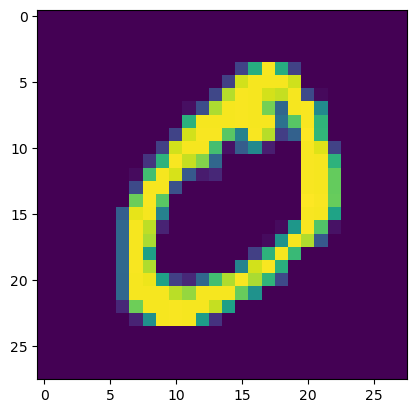

In [56]:
plt.imshow(x_train[1])